# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity =  city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | aripuana
Processing Record 3 of Set 1 | morris
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | malindi
Processing Record 6 of Set 1 | robore
Processing Record 7 of Set 1 | zaidpur
Processing Record 8 of Set 1 | pangoa
Processing Record 9 of Set 1 | warrnambool
Processing Record 10 of Set 1 | vorgashor
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | okhotsk
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | nova sintra
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | tazovsky
Processing Record 17 of Set 1 | badger
Processing Record 18 of Set 1 | minot
Processing Record 19 of Set 1 | al azraq ash shamali
City not found. Skipping...
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | necochea
Processing Record 22 of Set 1 |

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,39.02,91,99,3.02,GS,1685673414
1,aripuana,-9.1667,-60.6333,71.92,99,100,2.06,BR,1685673414
2,morris,40.8334,-74.5329,68.85,74,0,0.00,US,1685673414
3,jamestown,42.0970,-79.2353,74.84,46,0,8.05,US,1685673238
4,malindi,-3.2175,40.1191,76.06,86,6,8.59,KE,1685673209


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,39.02,91,99,3.02,GS,1685673414
1,aripuana,-9.1667,-60.6333,71.92,99,100,2.06,BR,1685673414
2,morris,40.8334,-74.5329,68.85,74,0,0.00,US,1685673414
3,jamestown,42.0970,-79.2353,74.84,46,0,8.05,US,1685673238
4,malindi,-3.2175,40.1191,76.06,86,6,8.59,KE,1685673209


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

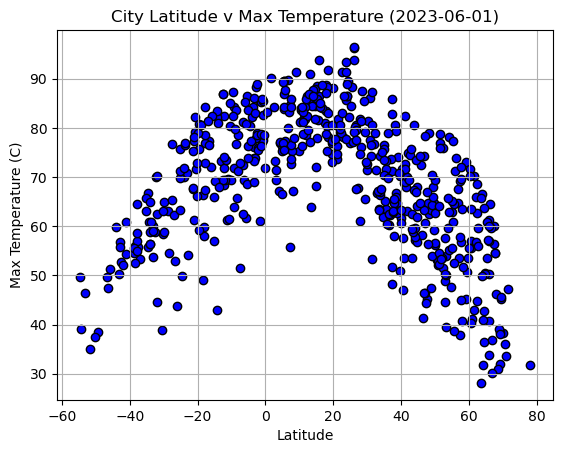

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c = 'blue', edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude v Max Temperature (2023-06-01)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

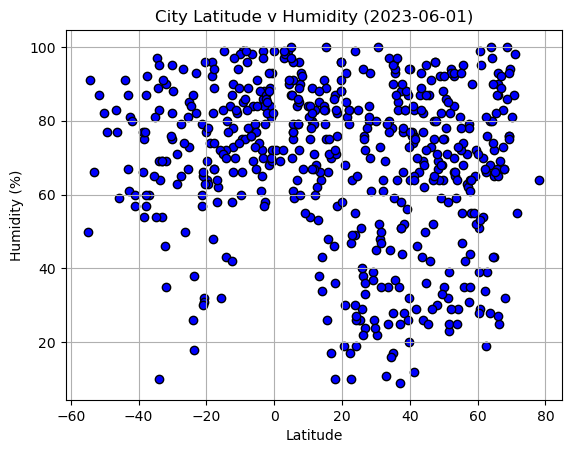

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c = 'blue', edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude v Humidity (2023-06-01)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

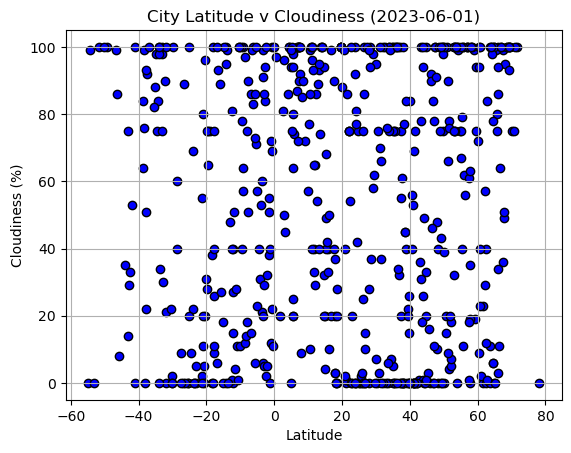

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], c = 'blue', edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude v Cloudiness (2023-06-01)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

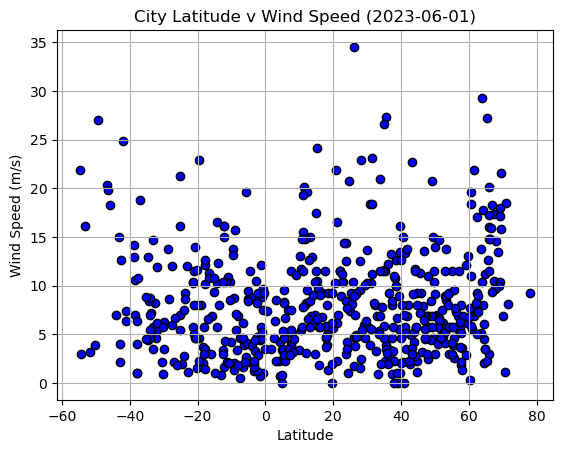

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], c = 'blue', edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude v Wind Speed (2023-06-01)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_lin(df, condition1, condition2):
    slope, int, r, p, st_err = linregress(df[condition1], df[condition2])
    fit = slope * df[condition1] + int
    str_fit = f'y = {slope:.2f}x + {int:.2f}'
    plt.scatter(df[condition1], df[condition2])
    plt.xlabel(condition1)
    plt.ylabel(condition2)
    plt.plot(df[condition1], fit, color = 'red')
    print(f'The r value is: {r}')
    
    xmin, xmax, ymin, ymax = plt.axis()
    plt.text(xmin + 10, ymin + 10, str_fit, color = 'red')


In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,morris,40.8334,-74.5329,68.85,74,0,0.00,US,1685673414
3,jamestown,42.0970,-79.2353,74.84,46,0,8.05,US,1685673238
6,zaidpur,26.8333,81.3333,80.67,24,15,9.15,IN,1685673415
9,vorgashor,67.5833,63.9500,56.48,73,36,10.42,RU,1685673416
11,okhotsk,59.3833,143.3000,50.68,72,94,6.11,RU,1685673417


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,39.02,91,99,3.02,GS,1685673414
1,aripuana,-9.1667,-60.6333,71.92,99,100,2.06,BR,1685673414
4,malindi,-3.2175,40.1191,76.06,86,6,8.59,KE,1685673209
5,robore,-18.3333,-59.7500,66.43,92,0,2.06,BO,1685673415
7,pangoa,-12.1167,-73.0000,68.43,90,27,1.68,PE,1685673416


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.7647883183511501


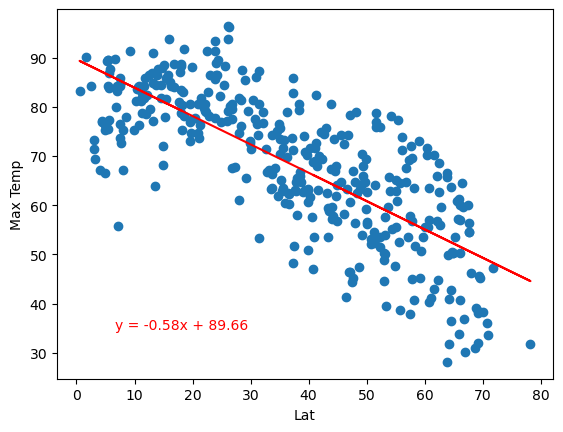

In [56]:
# Linear regression on Northern Hemisphere
plot_lin(northern_hemi_df, 'Lat', 'Max Temp')

The r value is: 0.7457415312636769


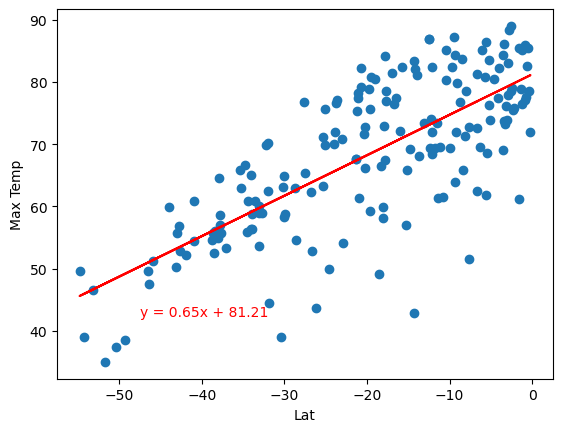

In [57]:
# Linear regression on Southern Hemisphere
plot_lin(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** In the northern hemisphere, as latitude increases, max temp decreases.  This makes sense because more northern countries above the northern hemisphere have colder temperatures.  However, as the southern hemisphere latitude increases, max temperature increases.  This also makes sense because below the southern hemisphere, temperature increases with latitude. Both correlations are pretty strong.

### Humidity vs. Latitude Linear Regression Plot

The r value is: -0.07419556455252414


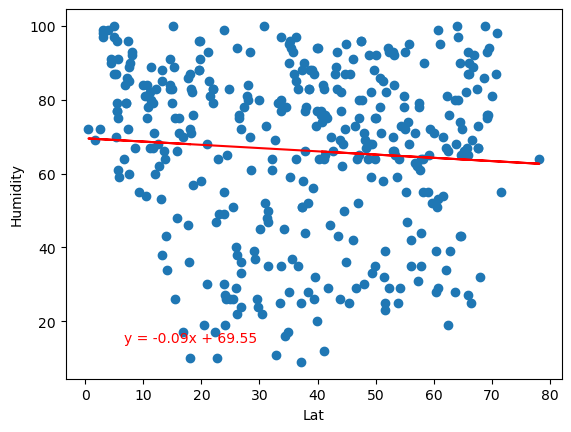

In [58]:
# Northern Hemisphere
plot_lin(northern_hemi_df, 'Lat', 'Humidity')

The r value is: 0.1993585463679029


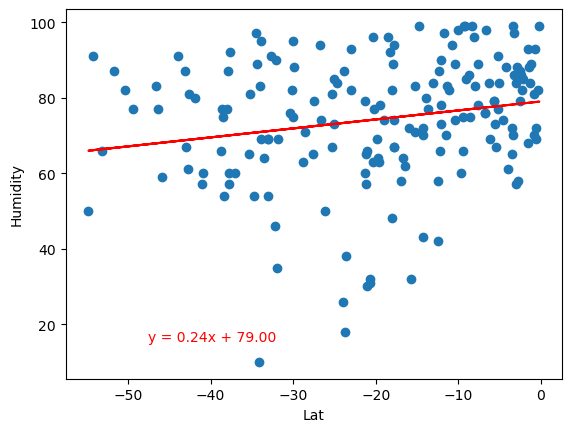

In [59]:
# Southern Hemisphere
plot_lin(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** Both correlations are pretty weak (r = -.07 for northern hemisphere, r = .20 for southern hemisphere). Therefore, latitude and humidity have a very weak correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: -0.02320214023530789


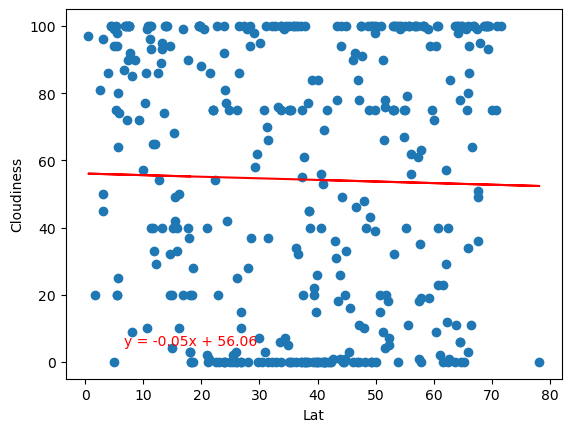

In [60]:
# Northern Hemisphere
plot_lin(northern_hemi_df, 'Lat', 'Cloudiness')

The r value is: -0.06287222030893026


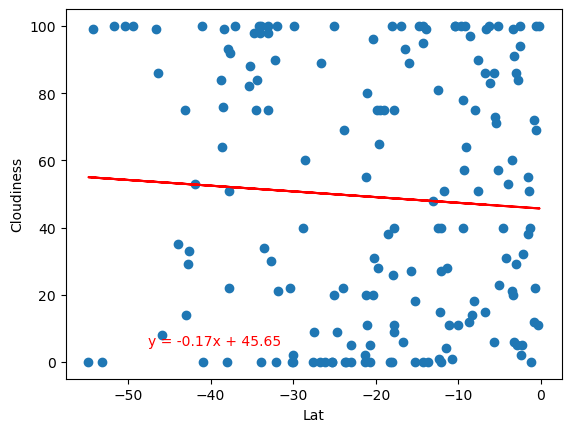

In [61]:
# Southern Hemisphere
plot_lin(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** Similar to humidity, our r values are really small for both northern and southern hemispheres (-.02 and -.06 respectively). Therefore, latitude and cloudiness have very weak correlations. 

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.1372453733886373


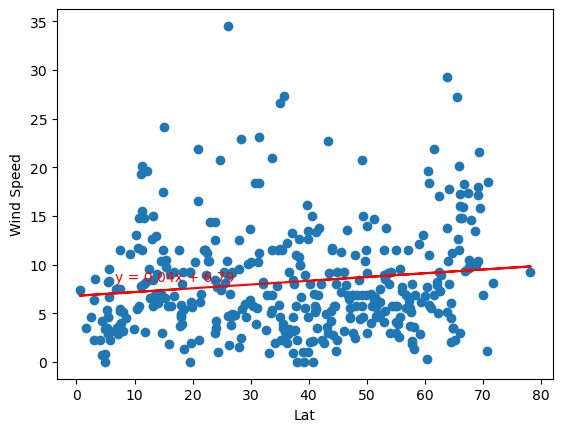

In [65]:
# Northern Hemisphere
plot_lin(northern_hemi_df, 'Lat', 'Wind Speed')

The r value is: -0.2738035387162688


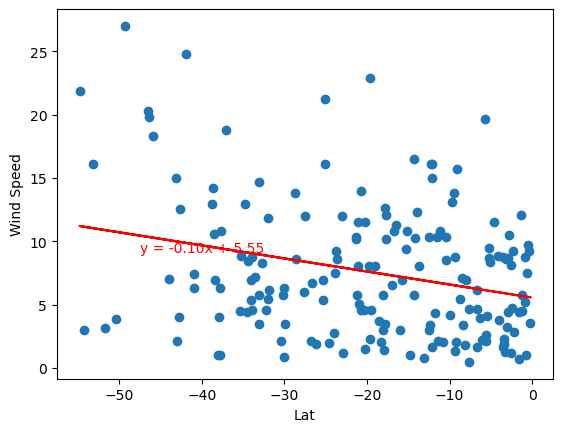

In [66]:
# Southern Hemisphere
plot_lin(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** Similar to humidity and cloudiness, our r values are really small for both northern and southern hemispheres (.13 and -.27 respectively). Therefore, latitude and wind speed have very weak correlations. 